In [1]:
require 'daru'
require 'daru_plotting_plotly'
require 'rbplotly'
require 'hg'

class Numeric
  def mili
    self.to_f * 10**(-3)
  end
  
  def micro
    self.to_f * 10**(-6)
  end
end

Daru.plotting_library = :plotly

:plotly

# 実験10

In [2]:
Daru::DataFrame.from_csv('data/jikken10.csv', encoding: 'UTF-8').tap do |df|
  df.plot(x: 'Ib', y: 'Ic', layout: {title: 'Ic'}).show
  df.plot(x: 'Ib', y: 'Vc', layout: {title: 'Vc'}).show
  df.plot(x: 'Ib', y: 'Pc', layout: {title: 'トランジスタの消費電力'}).show
  df.plot(x: 'Ib', y: 'Pl', layout: {title: '電球の消費電力'}).show
  df.plot(x: 'Ib', y: 'ef', layout: {title: '変換効率'}).show
end

#<Plotly::Offline::HTML:0x007fde3a8c6318 @id="1cafd980-c416-49b5-8357-ae981498d917", @data=[{:x=>[0.0014, 0.0012, 0.001, 0.0008, 0.0006, 0.0004, 0.0002, 0.0], :y=>[0.138, 0.133, 0.1179, 0.10300000000000001, 0.084, 0.0559, 0.028800000000000003, 0], :type=>:scatter, :mode=>"", :name=>"Ic"}], @layout={:width=>1000, :height=>500, :title=>"Ic"}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007fde3a315ec8 @id="d6562840-6be5-4b22-8921-18502e555163", @data=[{:x=>[0.0014, 0.0012, 0.001, 0.0008, 0.0006, 0.0004, 0.0002, 0.0], :y=>[0.2, 2.54, 10, 16.9, 24.2, 31.8, 34.3, 35.8], :type=>:scatter, :mode=>"", :name=>"Vc"}], @layout={:width=>1000, :height=>500, :title=>"Vc"}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007fde3a326f48 @id="b5b0e6fe-fedf-463e-bb1a-ba3308215b90", @data=[{:x=>[0.0014, 0.0012, 0.001, 0.0008, 0.0006, 0.0004, 0.0002, 0.0], :y=>[0.027600000000000003, 0.33782, 1.179, 1.7407, 2.0328, 1.77762, 0.98784, 0.0], :type=>:scatter, :mode=>"", :name=>"Pc"}], @layout={:width=>1000, :height=>500, :title=>"トランジスタの消費電力"}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007fde3a334440 @id="9de8d03c-358c-464d-808e-fe6514786220", @data=[{:x=>[0.0014, 0.0012, 0.001, 0.0008, 0.0006, 0.0004, 0.0002, 0.0], :y=>[4.9404, 4.4501800000000005, 3.0654000000000003, 1.9673000000000003, 0.9912000000000001, 0.23477999999999996, 0.04896000000000009, 0.0], :type=>:scatter, :mode=>"", :name=>"Pl"}], @layout={:width=>1000, :height=>500, :title=>"電球の消費電力"}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007fde3aa67cd0 @id="40dcaeaa-65cb-4bda-bc4d-d0f44dc364a4", @data=[{:x=>[0.0014, 0.0012, 0.001, 0.0008, 0.0006, 0.0004, 0.0002, 0.0], :y=>[0.9944444444444446, 0.9294444444444445, 0.7222222222222222, 0.5305555555555556, 0.3277777777777778, 0.11666666666666665, 0.0472222222222223, "NaN"], :type=>:scatter, :mode=>"", :name=>"ef"}], @layout={:width=>1000, :height=>500, :title=>"変換効率"}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Daru::DataFrame(8x7)>
                    Ib         Ic         Vc       temp         Pc         Pl         ef
          0     0.0014      0.138        0.2        冷たい 0.02760000     4.9404 0.99444444
          1     0.0012      0.133       2.54        冷たい    0.33782 4.45018000 0.92944444
          2      0.001     0.1179         10        暖かい      1.179 3.06540000 0.72222222
          3     0.0008 0.10300000       16.9        暖かい     1.7407 1.96730000 0.53055555
          4     0.0006      0.084       24.2        暖かい     2.0328 0.99120000 0.32777777
          5     0.0004     0.0559       31.8        暖かい    1.77762 0.23477999 0.11666666
          6     0.0002 0.02880000       34.3        暖かい    0.98784 0.04896000 0.04722222
          7        0.0          0       35.8        暖かい        0.0        0.0        NaN

# 実験11

In [3]:
Hg::Hg.create do |gen|
  gen.headers :duty_ratio, :Ic, :Vc
  gen.body <<BODY
50, 82.8.mili , 17.5
76, 111.8.mili, 8.9
33, 61.9.mili , 23.8
66, 102.mili  , 11.9
22, 46.5.mili , 27.7
78, 114.mili,   8
12, 32.mili,   31
88, 124.mili, 4.81
BODY
end.daru_dataframe.tap do |df|
  df.sort! [:duty_ratio]
  df.add_vector :Pl, df.map_rows { |row| 36 * row[:Ic] }
end.write_csv('data/jikken11.csv')

In [4]:
Daru::DataFrame.from_csv('data/jikken11.csv').tap do |df|
  df.plot(x: 'duty_ratio', y: 'Ic', layout: { title: 'コレクタ電流' }).show
  df.plot(x: 'duty_ratio', y: 'Vc', layout: { title: 'コレクタ電圧' }).show
  df.plot(x: 'duty_ratio', y: 'Pl', layout: { title: '負荷の消費電力' }).show
end
nil

#<Plotly::Offline::HTML:0x007fde3aa87828 @id="eb4c89dc-95cd-4953-a394-333fe93b72b5", @data=[{:x=>[12, 22, 33, 50, 66, 76, 78, 88], :y=>[0.032, 0.0465, 0.0619, 0.0828, 0.10200000000000001, 0.1118, 0.114, 0.124], :type=>:scatter, :mode=>"", :name=>"Ic"}], @layout={:width=>1000, :height=>500, :title=>"コレクタ電流"}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007fde3ba53130 @id="d504cfad-4783-4555-b58b-b24fc1c4f5fb", @data=[{:x=>[12, 22, 33, 50, 66, 76, 78, 88], :y=>[31, 27.7, 23.8, 17.5, 11.9, 8.9, 8, 4.81], :type=>:scatter, :mode=>"", :name=>"Vc"}], @layout={:width=>1000, :height=>500, :title=>"コレクタ電圧"}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007fde3ba61cf8 @id="a539dd37-dfe8-4333-80c1-dc704343a7b4", @data=[{:x=>[12, 22, 33, 50, 66, 76, 78, 88], :y=>[1.1520000000000001, 1.674, 2.2283999999999997, 2.9808, 3.672, 4.0248, 4.104, 4.464], :type=>:scatter, :mode=>"", :name=>"Pl"}], @layout={:width=>1000, :height=>500, :title=>"負荷の消費電力"}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

# 実験12

In [5]:
# 上り
Hg::Hg.create do |gen|
  gen.headers :Vak, :Ia, :Ig
  gen.body <<BODY
36, 0.4.mili, 2.mili
36, 0.4.mili, 4.mili
36, 0.4.mili, 6.mili
36, 0.4.mili, 8.mili
36, 0.4.mili, 9.mili
0.95, 136.5.mili, 9.8.mili
0.95, 137.mili, 12.mili
0.95, 137.mili, 14.mili
0.95, 137.mili, 16.mili
0.95, 137.mili, 18.mili
BODY
end.daru_dataframe.tap do |df|
  df.add_vector :P, df[:Ia].to_a.zip(df[:Vak].to_a).map { |i, v| i * v }
  df.plot(x: :Ig, y: :Ia, layout: { title: "Ig - Ia", xaxis: { title: 'Ig(A)' }, yaxis: { title: 'Ia(A)' } }).show
  df.plot(x: :Ig, y: :Vak, layout: { title: "Ig - Vak", xaxis: { title: 'Ig(A)' }, yaxis: { title: 'Vak(V)' } }).show
  df.plot(x: :Ig, y: :P, layout: { title: "Ig - P", xaxis: { title: 'Ig(A)' }, yaxis: { title: 'P(W)' } }).show
end
nil

#<Plotly::Offline::HTML:0x007fde3b1b49e8 @id="599e29f5-80c3-4250-ab93-4db213f49445", @data=[{:x=>[0.002, 0.004, 0.006, 0.008, 0.009000000000000001, 0.009800000000000001, 0.012, 0.014, 0.016, 0.018000000000000002], :y=>[0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.1365, 0.137, 0.137, 0.137, 0.137], :type=>:scatter, :mode=>"", :name=>:Ia}], @layout={:width=>1000, :height=>500, :title=>"Ig - Ia", :xaxis=>{:title=>"Ig(A)"}, :yaxis=>{:title=>"Ia(A)"}}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007fde3b3e6338 @id="dae09cbc-b9f7-4ad7-8eae-75798b9d5458", @data=[{:x=>[0.002, 0.004, 0.006, 0.008, 0.009000000000000001, 0.009800000000000001, 0.012, 0.014, 0.016, 0.018000000000000002], :y=>[36, 36, 36, 36, 36, 0.95, 0.95, 0.95, 0.95, 0.95], :type=>:scatter, :mode=>"", :name=>:Vak}], @layout={:width=>1000, :height=>500, :title=>"Ig - Vak", :xaxis=>{:title=>"Ig(A)"}, :yaxis=>{:title=>"Vak(V)"}}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007fde3a35ead8 @id="5c2df26b-35e8-4f26-b332-54922e192163", @data=[{:x=>[0.002, 0.004, 0.006, 0.008, 0.009000000000000001, 0.009800000000000001, 0.012, 0.014, 0.016, 0.018000000000000002], :y=>[0.014400000000000001, 0.014400000000000001, 0.014400000000000001, 0.014400000000000001, 0.014400000000000001, 0.129675, 0.13015000000000002, 0.13015000000000002, 0.13015000000000002, 0.13015000000000002], :type=>:scatter, :mode=>"", :name=>:P}], @layout={:width=>1000, :height=>500, :title=>"Ig - P", :xaxis=>{:title=>"Ig(A)"}, :yaxis=>{:title=>"P(W)"}}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

In [6]:
#下り
Hg::Hg.create do |gen|
  gen.headers :Vak, :Ia, :Ig
  gen.body <<BODY
0.95, 137.mili, 18.mili
0.95, 137.mili, 16.mili
0.95, 137.mili, 14.mili
0.95, 137.mili, 12.mili
0.95, 137.mili, 10.mili
0.95, 137.mili, 8.mili
0.95, 137.mili, 6.mili
0.95, 137.mili, 4.mili
0.95, 137.mili, 2.mili
0.95, 137.mili, 0.mili
BODY
end.daru_dataframe.tap do |df|
  df.add_vector :P, df[:Ia].to_a.zip(df[:Vak].to_a).map { |i, v| i * v }
  df.plot(x: :Ig, y: :Ia, layout: { title: "Ig - Ia", xaxis: { title: 'Ig(A)' }, yaxis: { title: 'Ia(A)' } }).show
  df.plot(x: :Ig, y: :Vak, layout: { title: "Ig - Vak", xaxis: { title: 'Ig(A)' }, yaxis: { title: 'Vak(V)' } }).show
  df.plot(x: :Ig, y: :P, layout: { title: "Ig - P", xaxis: { title: 'Ig(A)' }, yaxis: { title: 'P(W)' } }).show
end
nil

#<Plotly::Offline::HTML:0x007fde3a374ea0 @id="a36050d8-a2fb-433f-a868-20f162a0338d", @data=[{:x=>[0.018000000000000002, 0.016, 0.014, 0.012, 0.01, 0.008, 0.006, 0.004, 0.002, 0.0], :y=>[0.137, 0.137, 0.137, 0.137, 0.137, 0.137, 0.137, 0.137, 0.137, 0.137], :type=>:scatter, :mode=>"", :name=>:Ia}], @layout={:width=>1000, :height=>500, :title=>"Ig - Ia", :xaxis=>{:title=>"Ig(A)"}, :yaxis=>{:title=>"Ia(A)"}}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007fde3ba790b0 @id="f32f6b53-3023-4d1d-a92e-4852ac750331", @data=[{:x=>[0.018000000000000002, 0.016, 0.014, 0.012, 0.01, 0.008, 0.006, 0.004, 0.002, 0.0], :y=>[0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95], :type=>:scatter, :mode=>"", :name=>:Vak}], @layout={:width=>1000, :height=>500, :title=>"Ig - Vak", :xaxis=>{:title=>"Ig(A)"}, :yaxis=>{:title=>"Vak(V)"}}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007fde3aac5470 @id="d8a3cb6d-9a42-4837-8361-3536ed9b54ba", @data=[{:x=>[0.018000000000000002, 0.016, 0.014, 0.012, 0.01, 0.008, 0.006, 0.004, 0.002, 0.0], :y=>[0.13015000000000002, 0.13015000000000002, 0.13015000000000002, 0.13015000000000002, 0.13015000000000002, 0.13015000000000002, 0.13015000000000002, 0.13015000000000002, 0.13015000000000002, 0.13015000000000002], :type=>:scatter, :mode=>"", :name=>:P}], @layout={:width=>1000, :height=>500, :title=>"Ig - P", :xaxis=>{:title=>"Ig(A)"}, :yaxis=>{:title=>"P(W)"}}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

# 実験13

In [7]:
=begin
Hg::Hg.create do |gen|
  gen.headers :Vak, :Ia
  gen.body <<BODY
0.8, 101.mili
0.79, 75.mili
0.78, 68.mili
0.779, 60.mili
0.776, 48.mili
0.772, 38.mili
0.77, 29.mili
1.82, 0.6.mili
BODY
end.daru_dataframe.tap do |df|
  df.plot(x: :Ia, y: :Vak, layout: { title: 'Ia - Vak', xaxis: { title: 'Ia(A)' }, yaxis: { title: 'Vak(V)' } }).show
end
nil
=end

In [12]:
Hg::Hg.create do |gen|
  gen.headers :Vak, :Ia
  gen.body <<BODY
0.77, 68.4.mili
0.76, 60.mili
0.758, 48.9.mili
0.754, 40.2.mili
0.778, 28.2.mili
0.81, 24.9.mili
0.80, 24.3.mili
0.81, 23.78.mili
1.84, 0.9.mili
1.75, 0.9.mili
1.58, 0.9.mili
1.38, 0.5.mili
1.19, 0.45.mili
0.98, 0.4.mili
0.8, 0.34.mili
0.6, 0.24.mili
0.4, 0.2.mili
0.2, 0.13.mili
0.1, 0.1.mili
BODY
end.daru_dataframe.tap do |df|
  df.plot(x: :Vak, y: :Ia, layout: { title: 'Ia - Vak', xaxis: { title: 'Vak(V)' }, yaxis: { title: 'Ia(A)' } }).show
end
nil

#<Plotly::Offline::HTML:0x007fde3b4933a8 @id="7fe97021-5212-44d6-9e74-570796403363", @data=[{:x=>[0.77, 0.76, 0.758, 0.754, 0.778, 0.81, 0.8, 0.81, 1.84, 1.75, 1.58, 1.38, 1.19, 0.98, 0.8, 0.6, 0.4, 0.2, 0.1], :y=>[0.0684, 0.06, 0.0489, 0.04020000000000001, 0.0282, 0.0249, 0.024300000000000002, 0.023780000000000003, 0.0009000000000000001, 0.0009000000000000001, 0.0009000000000000001, 0.0005, 0.00045000000000000004, 0.0004, 0.00034, 0.00024, 0.0002, 0.00013000000000000002, 0.0001], :type=>:scatter, :mode=>"", :name=>:Ia}], @layout={:width=>1000, :height=>500, :title=>"Ia - Vak", :xaxis=>{:title=>"Vak(V)"}, :yaxis=>{:title=>"Ia(A)"}}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

Vakのターンオン時

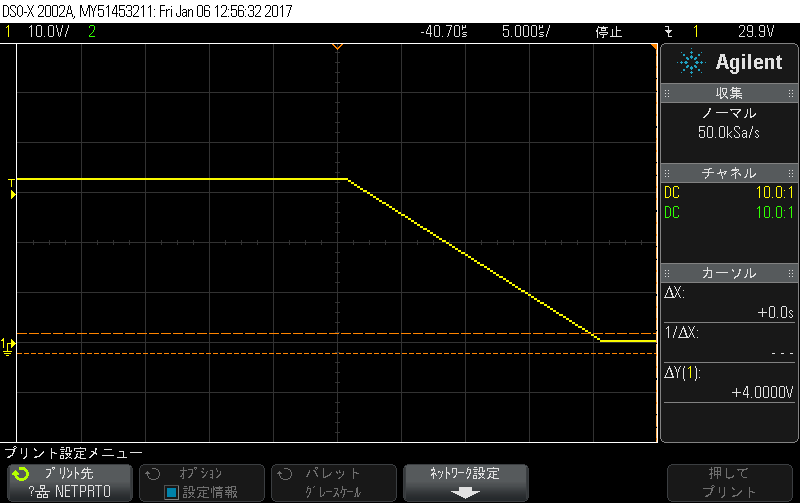

In [9]:
File.open('data/Vak_turn_on.png')

Iaのターンオン時

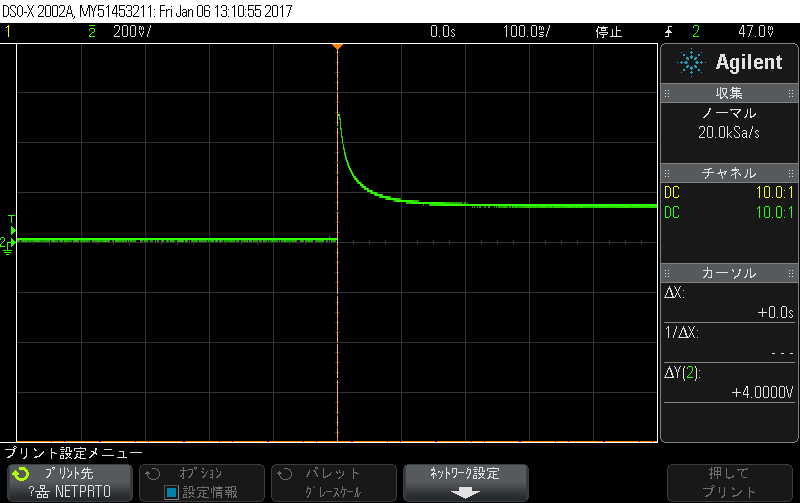

In [10]:
File.open('data/Ia_turn_on_1.png')

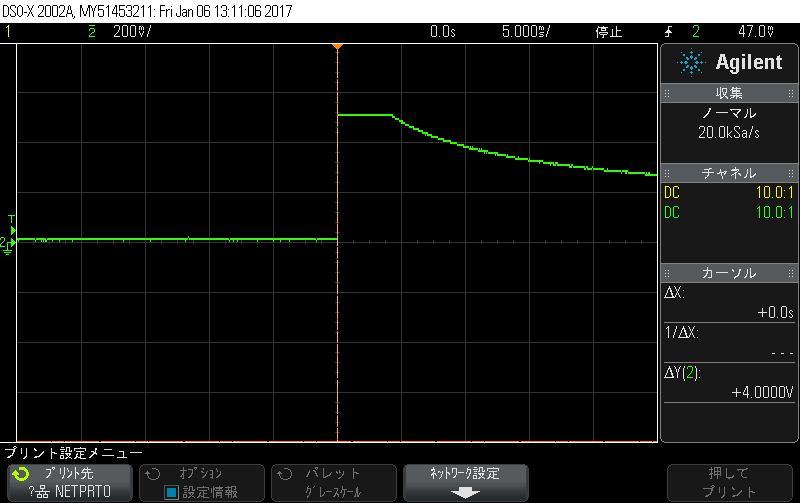

In [11]:
File.open('data/Ia_turn_on_2.png')

# 実験14

In [23]:
Hg::Hg.create do |gen|
  gen.headers :length, :V, :I
  gen.body <<BODY
0.5, 103.0, 0.25
1.0, 99.0, 0.245
1.5, 90.5, 0.23
2.0, 77.0, 0.21
2.5, 55.0, 0.179
3.0, 32.5, 0.138
3.5, 10.0, 0.082
BODY
end.daru_dataframe.tap do |df|
  half_period = 4.0
  df[:alpha] = df[:length].to_a.map { |it| it / half_period * Math::PI }
  df.plot(x: :alpha, y: :V, layout: { title: 'alpha - V', xaxis: { title: 'alpha' }, yaxis: { title: 'V(V)' } }).show
  df.plot(x: :alpha, y: :I, layout: { title: 'alpha - I', xaxis: { title: 'alpha' }, yaxis: { title: 'I(A)' } }).show
end

#<Plotly::Offline::HTML:0x007fde3ba032e8 @id="ec534fc4-9760-41fc-bc0e-871bdcf2a56c", @data=[{:x=>[0.39269908169872414, 0.7853981633974483, 1.1780972450961724, 1.5707963267948966, 1.9634954084936207, 2.356194490192345, 2.748893571891069], :y=>[103.0, 99.0, 90.5, 77.0, 55.0, 32.5, 10.0], :type=>:scatter, :mode=>"", :name=>:V}], @layout={:width=>1000, :height=>500, :title=>"alpha - V", :xaxis=>{:title=>"alpha"}, :yaxis=>{:title=>"V(V)"}}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007fde3b3a5400 @id="830464f0-e7de-4c2a-99fc-bdcb2ae36e0c", @data=[{:x=>[0.39269908169872414, 0.7853981633974483, 1.1780972450961724, 1.5707963267948966, 1.9634954084936207, 2.356194490192345, 2.748893571891069], :y=>[0.25, 0.245, 0.23, 0.21, 0.179, 0.138, 0.082], :type=>:scatter, :mode=>"", :name=>:I}], @layout={:width=>1000, :height=>500, :title=>"alpha - I", :xaxis=>{:title=>"alpha"}, :yaxis=>{:title=>"I(A)"}}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Daru::DataFrame(7x4)>
                     I          V     length      alpha
          0       0.25      103.0        0.5 0.39269908
          1      0.245       99.0        1.0 0.78539816
          2       0.23       90.5        1.5 1.17809724
          3       0.21       77.0        2.0 1.57079632
          4      0.179       55.0        2.5 1.96349540
          5      0.138       32.5        3.0 2.35619449
          6      0.082       10.0        3.5 2.74889357

In [67]:
['0.25', '0.5', '0.6', '0.75'].each do |name|
  Daru::DataFrame.from_csv("data/jikken15/#{name}.csv").tap do |df|
    df.map_rows! { |row| row['Volt'] = row['Volt'] || 0.0 ; row  }
    df.add_vector :x, df.index.to_a.map { |it| it.to_f / 2000.0 * 2 * Math::PI }
  end.tap do |df|
    N = 21
    a0 = 0 # wont fix
    a = (1..N).map do |n|
      1 / Math::PI * df.map_rows do |row|
        Math.cos(n * row[:x]) * row['Volt'] * (1/2000.0 * 2 * Math::PI)
      end.reduce(:+)
    end
    b = (1..N).map do |n|
      1 / Math::PI * df.map_rows do |row|
        Math.sin(n * row[:x]) * row['Volt'] * (1/2000.0 * 2 * Math::PI)
      end.reduce(:+)
    end
    xs = (0..1999).to_a.map {|i| i / 2000.0 * 2 * Math::PI}
    ys = xs.map { |i| (1..N).map { |n| a[n - 1] * Math.cos(n * i) + b[n - 1] * Math.sin(n * i) }.reduce(:+) }
    Plotly::Plot.new(data: [{ x: xs , y: ys }, { x: df[:x].to_a, y: df['Volt'].to_a }]).show
  end
end
nil

<main>:5: warning: already initialized constant N
<main>:5: warning: previous definition of N was here


#<Plotly::Offline::HTML:0x007fde3ba33b28 @id="af4f725e-6eb9-46dc-a883-72e687800f18", @data=[{:x=>[0.0, 0.0031415926535897933, 0.006283185307179587, 0.00942477796076938, 0.012566370614359173, 0.015707963267948967, 0.01884955592153876, 0.02199114857512855, 0.025132741228718346, 0.028274333882308135, 0.031415926535897934, 0.03455751918948772, 0.03769911184307752, 0.04084070449666731, 0.0439822971502571, 0.047123889803846894, 0.05026548245743669, 0.053407075111026485, 0.05654866776461627, 0.05969026041820607, 0.06283185307179587, 0.06597344572538566, 0.06911503837897544, 0.07225663103256524, 0.07539822368615504, 0.07853981633974483, 0.08168140899333462, 0.08482300164692441, 0.0879645943005142, 0.09110618695410401, 0.09424777960769379, 0.09738937226128358, 0.10053096491487339, 0.10367255756846318, 0.10681415022205297, 0.10995574287564278, 0.11309733552923254, 0.11623892818282235, 0.11938052083641214, 0.12252211349000193, 0.12566370614359174, 0.12880529879718153, 0.13194689145077132, 0.13508848410436108, 0.13823007675795088, 0.1413716694115407, 0.1445132620651305, 0.14765485471872028, 0.15079644737231007, 0.15393804002589986, 0.15707963267948966, 0.16022122533307945, 0.16336281798666924, 0.16650441064025903, 0.16964600329384882, 0.17278759594743862, 0.1759291886010284, 0.17907078125461823, 0.18221237390820802, 0.18535396656179778, 0.18849555921538758, 0.19163715186897737, 0.19477874452256716, 0.19792033717615698, 0.20106192982974677, 0.20420352248333656, 0.20734511513692636, 0.21048670779051615, 0.21362830044410594, 0.21676989309769573, 0.21991148575128555, 0.2230530784048753, 0.22619467105846508, 0.22933626371205487, 0.2324778563656447, 0.23561944901923448, 0.23876104167282428, 0.24190263432641407, 0.24504422698000386, 0.24818581963359365, 0.25132741228718347, 0.25446900494077324, 0.25761059759436306, 0.2607521902479528, 0.26389378290154264, 0.26703537555513246, 0.27017696820872217, 0.273318560862312, 0.27646015351590175, 0.27960174616949157, 0.2827433388230814, 0.28588493147667116, 0.289026524130261, 0.29216811678385074, 0.29530970943744056, 0.2984513020910303, 0.30159289474462014, 0.30473448739820996, 0.3078760800517997, 0.31101767270538955, 0.3141592653589793, 0.31730085801256913, 0.3204424506661589, 0.32358404331974866, 0.3267256359733385, 0.32986722862692824, 0.33300882128051806, 0.3361504139341079, 0.33929200658769765, 0.34243359924128747, 0.34557519189487723, 0.34871678454846705, 0.3518583772020568, 0.35499996985564664, 0.35814156250923646, 0.3612831551628262, 0.36442474781641604, 0.3675663404700058, 0.37070793312359557, 0.3738495257771854, 0.37699111843077515, 0.38013271108436497, 0.38327430373795474, 0.38641589639154456, 0.3895574890451343, 0.39269908169872414, 0.39584067435231396, 0.3989822670059037, 0.40212385965949354, 0.4052654523130833, 0.4084070449666731, 0.4115486376202629, 0.4146902302738527, 0.41783182292744253, 0.4209734155810323, 0.4241150082346221, 0.4272566008882119, 0.4303981935418017, 0.43353978619539146, 0.4366813788489813, 0.4398229715025711, 0.4429645641561608, 0.4461061568097506, 0.4492477494633404, 0.45238934211693016, 0.45553093477052, 0.45867252742410974, 0.46181412007769956, 0.4649557127312894, 0.46809730538487915, 0.47123889803846897, 0.47438049069205873, 0.47752208334564855, 0.4806636759992383, 0.48380526865282814, 0.48694686130641796, 0.4900884539600077, 0.49323004661359754, 0.4963716392671873, 0.4995132319207771, 0.5026548245743669, 0.5057964172279567, 0.5089380098815465, 0.5120796025351363, 0.5152211951887261, 0.5183627878423159, 0.5215043804959056, 0.5246459731494955, 0.5277875658030853, 0.5309291584566751, 0.5340707511102649, 0.5372123437638546, 0.5403539364174443, 0.5434955290710342, 0.546637121724624, 0.5497787143782138, 0.5529203070318035, 0.5560618996853933, 0.5592034923389831, 0.562345084992573, 0.5654866776461628, 0.5686282702997525, 0.5717698629533423, 0.5749114556069321, 0.578053048260522, 0.5811946409141118, 0.5843362335677015, 0.5874778262212913, 0.5906194188748811, 0.593761011528470

<main>:5: warning: already initialized constant N
<main>:5: warning: previous definition of N was here


#<Plotly::Offline::HTML:0x007fde3b2879b0 @id="4038053a-8566-4833-804d-a022d203cdb7", @data=[{:x=>[0.0, 0.0031415926535897933, 0.006283185307179587, 0.00942477796076938, 0.012566370614359173, 0.015707963267948967, 0.01884955592153876, 0.02199114857512855, 0.025132741228718346, 0.028274333882308135, 0.031415926535897934, 0.03455751918948772, 0.03769911184307752, 0.04084070449666731, 0.0439822971502571, 0.047123889803846894, 0.05026548245743669, 0.053407075111026485, 0.05654866776461627, 0.05969026041820607, 0.06283185307179587, 0.06597344572538566, 0.06911503837897544, 0.07225663103256524, 0.07539822368615504, 0.07853981633974483, 0.08168140899333462, 0.08482300164692441, 0.0879645943005142, 0.09110618695410401, 0.09424777960769379, 0.09738937226128358, 0.10053096491487339, 0.10367255756846318, 0.10681415022205297, 0.10995574287564278, 0.11309733552923254, 0.11623892818282235, 0.11938052083641214, 0.12252211349000193, 0.12566370614359174, 0.12880529879718153, 0.13194689145077132, 0.13508848410436108, 0.13823007675795088, 0.1413716694115407, 0.1445132620651305, 0.14765485471872028, 0.15079644737231007, 0.15393804002589986, 0.15707963267948966, 0.16022122533307945, 0.16336281798666924, 0.16650441064025903, 0.16964600329384882, 0.17278759594743862, 0.1759291886010284, 0.17907078125461823, 0.18221237390820802, 0.18535396656179778, 0.18849555921538758, 0.19163715186897737, 0.19477874452256716, 0.19792033717615698, 0.20106192982974677, 0.20420352248333656, 0.20734511513692636, 0.21048670779051615, 0.21362830044410594, 0.21676989309769573, 0.21991148575128555, 0.2230530784048753, 0.22619467105846508, 0.22933626371205487, 0.2324778563656447, 0.23561944901923448, 0.23876104167282428, 0.24190263432641407, 0.24504422698000386, 0.24818581963359365, 0.25132741228718347, 0.25446900494077324, 0.25761059759436306, 0.2607521902479528, 0.26389378290154264, 0.26703537555513246, 0.27017696820872217, 0.273318560862312, 0.27646015351590175, 0.27960174616949157, 0.2827433388230814, 0.28588493147667116, 0.289026524130261, 0.29216811678385074, 0.29530970943744056, 0.2984513020910303, 0.30159289474462014, 0.30473448739820996, 0.3078760800517997, 0.31101767270538955, 0.3141592653589793, 0.31730085801256913, 0.3204424506661589, 0.32358404331974866, 0.3267256359733385, 0.32986722862692824, 0.33300882128051806, 0.3361504139341079, 0.33929200658769765, 0.34243359924128747, 0.34557519189487723, 0.34871678454846705, 0.3518583772020568, 0.35499996985564664, 0.35814156250923646, 0.3612831551628262, 0.36442474781641604, 0.3675663404700058, 0.37070793312359557, 0.3738495257771854, 0.37699111843077515, 0.38013271108436497, 0.38327430373795474, 0.38641589639154456, 0.3895574890451343, 0.39269908169872414, 0.39584067435231396, 0.3989822670059037, 0.40212385965949354, 0.4052654523130833, 0.4084070449666731, 0.4115486376202629, 0.4146902302738527, 0.41783182292744253, 0.4209734155810323, 0.4241150082346221, 0.4272566008882119, 0.4303981935418017, 0.43353978619539146, 0.4366813788489813, 0.4398229715025711, 0.4429645641561608, 0.4461061568097506, 0.4492477494633404, 0.45238934211693016, 0.45553093477052, 0.45867252742410974, 0.46181412007769956, 0.4649557127312894, 0.46809730538487915, 0.47123889803846897, 0.47438049069205873, 0.47752208334564855, 0.4806636759992383, 0.48380526865282814, 0.48694686130641796, 0.4900884539600077, 0.49323004661359754, 0.4963716392671873, 0.4995132319207771, 0.5026548245743669, 0.5057964172279567, 0.5089380098815465, 0.5120796025351363, 0.5152211951887261, 0.5183627878423159, 0.5215043804959056, 0.5246459731494955, 0.5277875658030853, 0.5309291584566751, 0.5340707511102649, 0.5372123437638546, 0.5403539364174443, 0.5434955290710342, 0.546637121724624, 0.5497787143782138, 0.5529203070318035, 0.5560618996853933, 0.5592034923389831, 0.562345084992573, 0.5654866776461628, 0.5686282702997525, 0.5717698629533423, 0.5749114556069321, 0.578053048260522, 0.5811946409141118, 0.5843362335677015, 0.5874778262212913, 0.5906194188748811, 0.593761011528470

<main>:5: warning: already initialized constant N
<main>:5: warning: previous definition of N was here


#<Plotly::Offline::HTML:0x007fde3a1fc0f0 @id="4956f673-5d95-46da-a9a9-ee00c73e2825", @data=[{:x=>[0.0, 0.0031415926535897933, 0.006283185307179587, 0.00942477796076938, 0.012566370614359173, 0.015707963267948967, 0.01884955592153876, 0.02199114857512855, 0.025132741228718346, 0.028274333882308135, 0.031415926535897934, 0.03455751918948772, 0.03769911184307752, 0.04084070449666731, 0.0439822971502571, 0.047123889803846894, 0.05026548245743669, 0.053407075111026485, 0.05654866776461627, 0.05969026041820607, 0.06283185307179587, 0.06597344572538566, 0.06911503837897544, 0.07225663103256524, 0.07539822368615504, 0.07853981633974483, 0.08168140899333462, 0.08482300164692441, 0.0879645943005142, 0.09110618695410401, 0.09424777960769379, 0.09738937226128358, 0.10053096491487339, 0.10367255756846318, 0.10681415022205297, 0.10995574287564278, 0.11309733552923254, 0.11623892818282235, 0.11938052083641214, 0.12252211349000193, 0.12566370614359174, 0.12880529879718153, 0.13194689145077132, 0.13508848410436108, 0.13823007675795088, 0.1413716694115407, 0.1445132620651305, 0.14765485471872028, 0.15079644737231007, 0.15393804002589986, 0.15707963267948966, 0.16022122533307945, 0.16336281798666924, 0.16650441064025903, 0.16964600329384882, 0.17278759594743862, 0.1759291886010284, 0.17907078125461823, 0.18221237390820802, 0.18535396656179778, 0.18849555921538758, 0.19163715186897737, 0.19477874452256716, 0.19792033717615698, 0.20106192982974677, 0.20420352248333656, 0.20734511513692636, 0.21048670779051615, 0.21362830044410594, 0.21676989309769573, 0.21991148575128555, 0.2230530784048753, 0.22619467105846508, 0.22933626371205487, 0.2324778563656447, 0.23561944901923448, 0.23876104167282428, 0.24190263432641407, 0.24504422698000386, 0.24818581963359365, 0.25132741228718347, 0.25446900494077324, 0.25761059759436306, 0.2607521902479528, 0.26389378290154264, 0.26703537555513246, 0.27017696820872217, 0.273318560862312, 0.27646015351590175, 0.27960174616949157, 0.2827433388230814, 0.28588493147667116, 0.289026524130261, 0.29216811678385074, 0.29530970943744056, 0.2984513020910303, 0.30159289474462014, 0.30473448739820996, 0.3078760800517997, 0.31101767270538955, 0.3141592653589793, 0.31730085801256913, 0.3204424506661589, 0.32358404331974866, 0.3267256359733385, 0.32986722862692824, 0.33300882128051806, 0.3361504139341079, 0.33929200658769765, 0.34243359924128747, 0.34557519189487723, 0.34871678454846705, 0.3518583772020568, 0.35499996985564664, 0.35814156250923646, 0.3612831551628262, 0.36442474781641604, 0.3675663404700058, 0.37070793312359557, 0.3738495257771854, 0.37699111843077515, 0.38013271108436497, 0.38327430373795474, 0.38641589639154456, 0.3895574890451343, 0.39269908169872414, 0.39584067435231396, 0.3989822670059037, 0.40212385965949354, 0.4052654523130833, 0.4084070449666731, 0.4115486376202629, 0.4146902302738527, 0.41783182292744253, 0.4209734155810323, 0.4241150082346221, 0.4272566008882119, 0.4303981935418017, 0.43353978619539146, 0.4366813788489813, 0.4398229715025711, 0.4429645641561608, 0.4461061568097506, 0.4492477494633404, 0.45238934211693016, 0.45553093477052, 0.45867252742410974, 0.46181412007769956, 0.4649557127312894, 0.46809730538487915, 0.47123889803846897, 0.47438049069205873, 0.47752208334564855, 0.4806636759992383, 0.48380526865282814, 0.48694686130641796, 0.4900884539600077, 0.49323004661359754, 0.4963716392671873, 0.4995132319207771, 0.5026548245743669, 0.5057964172279567, 0.5089380098815465, 0.5120796025351363, 0.5152211951887261, 0.5183627878423159, 0.5215043804959056, 0.5246459731494955, 0.5277875658030853, 0.5309291584566751, 0.5340707511102649, 0.5372123437638546, 0.5403539364174443, 0.5434955290710342, 0.546637121724624, 0.5497787143782138, 0.5529203070318035, 0.5560618996853933, 0.5592034923389831, 0.562345084992573, 0.5654866776461628, 0.5686282702997525, 0.5717698629533423, 0.5749114556069321, 0.578053048260522, 0.5811946409141118, 0.5843362335677015, 0.5874778262212913, 0.5906194188748811, 0.593761011528470

<main>:5: warning: already initialized constant N
<main>:5: warning: previous definition of N was here


#<Plotly::Offline::HTML:0x007fde3aab5b10 @id="57b3ba9d-3a1b-4d65-826f-515b5f93dd44", @data=[{:x=>[0.0, 0.0031415926535897933, 0.006283185307179587, 0.00942477796076938, 0.012566370614359173, 0.015707963267948967, 0.01884955592153876, 0.02199114857512855, 0.025132741228718346, 0.028274333882308135, 0.031415926535897934, 0.03455751918948772, 0.03769911184307752, 0.04084070449666731, 0.0439822971502571, 0.047123889803846894, 0.05026548245743669, 0.053407075111026485, 0.05654866776461627, 0.05969026041820607, 0.06283185307179587, 0.06597344572538566, 0.06911503837897544, 0.07225663103256524, 0.07539822368615504, 0.07853981633974483, 0.08168140899333462, 0.08482300164692441, 0.0879645943005142, 0.09110618695410401, 0.09424777960769379, 0.09738937226128358, 0.10053096491487339, 0.10367255756846318, 0.10681415022205297, 0.10995574287564278, 0.11309733552923254, 0.11623892818282235, 0.11938052083641214, 0.12252211349000193, 0.12566370614359174, 0.12880529879718153, 0.13194689145077132, 0.13508848410436108, 0.13823007675795088, 0.1413716694115407, 0.1445132620651305, 0.14765485471872028, 0.15079644737231007, 0.15393804002589986, 0.15707963267948966, 0.16022122533307945, 0.16336281798666924, 0.16650441064025903, 0.16964600329384882, 0.17278759594743862, 0.1759291886010284, 0.17907078125461823, 0.18221237390820802, 0.18535396656179778, 0.18849555921538758, 0.19163715186897737, 0.19477874452256716, 0.19792033717615698, 0.20106192982974677, 0.20420352248333656, 0.20734511513692636, 0.21048670779051615, 0.21362830044410594, 0.21676989309769573, 0.21991148575128555, 0.2230530784048753, 0.22619467105846508, 0.22933626371205487, 0.2324778563656447, 0.23561944901923448, 0.23876104167282428, 0.24190263432641407, 0.24504422698000386, 0.24818581963359365, 0.25132741228718347, 0.25446900494077324, 0.25761059759436306, 0.2607521902479528, 0.26389378290154264, 0.26703537555513246, 0.27017696820872217, 0.273318560862312, 0.27646015351590175, 0.27960174616949157, 0.2827433388230814, 0.28588493147667116, 0.289026524130261, 0.29216811678385074, 0.29530970943744056, 0.2984513020910303, 0.30159289474462014, 0.30473448739820996, 0.3078760800517997, 0.31101767270538955, 0.3141592653589793, 0.31730085801256913, 0.3204424506661589, 0.32358404331974866, 0.3267256359733385, 0.32986722862692824, 0.33300882128051806, 0.3361504139341079, 0.33929200658769765, 0.34243359924128747, 0.34557519189487723, 0.34871678454846705, 0.3518583772020568, 0.35499996985564664, 0.35814156250923646, 0.3612831551628262, 0.36442474781641604, 0.3675663404700058, 0.37070793312359557, 0.3738495257771854, 0.37699111843077515, 0.38013271108436497, 0.38327430373795474, 0.38641589639154456, 0.3895574890451343, 0.39269908169872414, 0.39584067435231396, 0.3989822670059037, 0.40212385965949354, 0.4052654523130833, 0.4084070449666731, 0.4115486376202629, 0.4146902302738527, 0.41783182292744253, 0.4209734155810323, 0.4241150082346221, 0.4272566008882119, 0.4303981935418017, 0.43353978619539146, 0.4366813788489813, 0.4398229715025711, 0.4429645641561608, 0.4461061568097506, 0.4492477494633404, 0.45238934211693016, 0.45553093477052, 0.45867252742410974, 0.46181412007769956, 0.4649557127312894, 0.46809730538487915, 0.47123889803846897, 0.47438049069205873, 0.47752208334564855, 0.4806636759992383, 0.48380526865282814, 0.48694686130641796, 0.4900884539600077, 0.49323004661359754, 0.4963716392671873, 0.4995132319207771, 0.5026548245743669, 0.5057964172279567, 0.5089380098815465, 0.5120796025351363, 0.5152211951887261, 0.5183627878423159, 0.5215043804959056, 0.5246459731494955, 0.5277875658030853, 0.5309291584566751, 0.5340707511102649, 0.5372123437638546, 0.5403539364174443, 0.5434955290710342, 0.546637121724624, 0.5497787143782138, 0.5529203070318035, 0.5560618996853933, 0.5592034923389831, 0.562345084992573, 0.5654866776461628, 0.5686282702997525, 0.5717698629533423, 0.5749114556069321, 0.578053048260522, 0.5811946409141118, 0.5843362335677015, 0.5874778262212913, 0.5906194188748811, 0.593761011528470

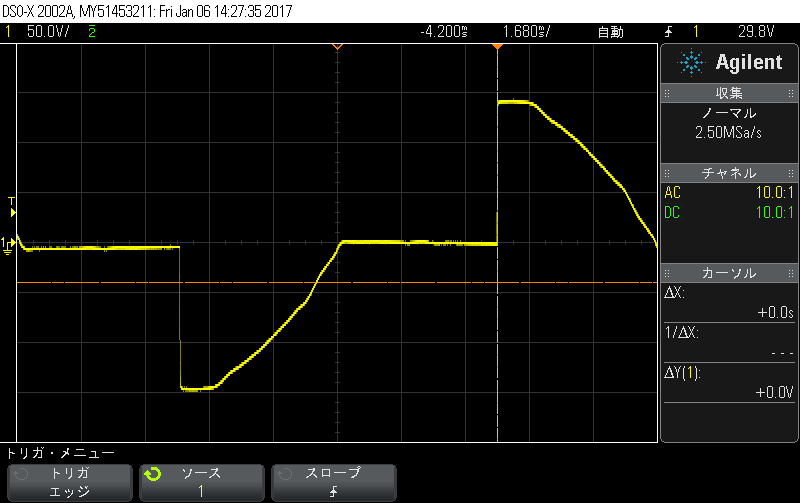

In [53]:
File.open('data/jikken15/0.5.png')